In [1]:
import pandas as pd

In [3]:
import tensorflow as tf
from keras import  models , layers
import matplotlib.pyplot as plt
import keras

In [15]:
import os
from PIL import Image

def check_images_in_directories(parent_dir):
    results = {}  # Dictionary to store results for each directory
    total_invalid_count = 0  # Total count of invalid files

    for subdir in os.listdir(parent_dir):
        subdir_path = os.path.join(parent_dir, subdir)

        # Skip files, only process directories
        if os.path.isdir(subdir_path):
            invalid_count = 0  # Count of invalid files in the current directory

            for file_name in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file_name)
                
                # Check if the file is an image
                try:
                    with Image.open(file_path) as img:
                        # Check image dimensions
                        if img.size != (128, 128):
                            print(f"Invalid size in {file_path}: {img.size}")
                            invalid_count += 1
                except Exception:
                    # File is not a valid image
                    print(f"Non-image file found: {file_path}")
                    invalid_count += 1

            # Store the result for the current directory
            results[subdir] = invalid_count
            total_invalid_count += invalid_count

    # Print summary
    print("\nSummary of invalid files per directory:")
    for directory, count in results.items():
        print(f"{directory}: {count} invalid file(s)")
    
    print(f"\nTotal invalid files: {total_invalid_count}")
    print("\nCheck complete.")

# Usage example
new_parent_dir = "DATA MLA FINALE AFTER"
check_images_in_directories(new_parent_dir)



Summary of invalid files per directory:
7A B: 0 invalid file(s)
7A E: 0 invalid file(s)
7A I: 0 invalid file(s)
7A M: 0 invalid file(s)
AlefE: 0 invalid file(s)
AlefI: 0 invalid file(s)
AYN_B: 0 invalid file(s)
AYN_E: 0 invalid file(s)
AYN_I: 0 invalid file(s)
AYN_M: 0 invalid file(s)
B: 0 invalid file(s)
BAA B: 0 invalid file(s)
BAA E: 0 invalid file(s)
BAA M: 0 invalid file(s)
Dad_B: 0 invalid file(s)
Dad_E: 0 invalid file(s)
Dad_M: 0 invalid file(s)
dal_I: 0 invalid file(s)
dal_m: 0 invalid file(s)
dhaa_B: 0 invalid file(s)
dhaa_M: 0 invalid file(s)
dhal_I: 0 invalid file(s)
dhal_M: 0 invalid file(s)
E: 0 invalid file(s)
Faa_B: 0 invalid file(s)
Faa_E: 0 invalid file(s)
Faa_M: 0 invalid file(s)
GHAYN_B: 0 invalid file(s)
GHAYN_E: 0 invalid file(s)
GHAYN_i: 0 invalid file(s)
GHAYN_M: 0 invalid file(s)
HA_B: 0 invalid file(s)
HA_E: 0 invalid file(s)
HA_M: 0 invalid file(s)
I: 0 invalid file(s)
JeemB: 0 invalid file(s)
JeemE: 0 invalid file(s)
JeemM: 0 invalid file(s)
Kaf_B: 0 invalid

In [14]:
import os
from PIL import Image

def process_directories(parent_dir):
    for subdir in os.listdir(parent_dir):
        subdir_path = os.path.join(parent_dir, subdir)

        # Skip files, only process directories
        if os.path.isdir(subdir_path):
            for file_name in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file_name)

                # Ensure the entry is a file before processing
                if os.path.isfile(file_path):
                    try:
                        # Check if the file is an image
                        with Image.open(file_path) as img:
                            # Check image dimensions
                            if img.size != (128, 128):
                                print(f"Resizing image: {file_path} (Current size: {img.size})")
                                img = img.resize((128, 128))
                                img.save(file_path)  # Overwrite the file with the resized image
                    except Exception:
                        # File is not a valid image; remove it
                        print(f"Removing non-image file: {file_path}")
                        try:
                            os.remove(file_path)
                        except PermissionError:
                            print(f"Permission denied: Unable to remove {file_path}")

    print("\nProcessing complete. All invalid files handled.")

# Usage example
new_parent_dir = "DATA MLA FINALE AFTER"
process_directories(new_parent_dir)


Processing complete. All invalid files handled.


In [16]:
import os
from PIL import Image, ImageOps

def process_and_resize_images(parent_dir, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    for subdir in os.listdir(parent_dir):
        subdir_path = os.path.join(parent_dir, subdir)

        # Skip files, only process directories
        if os.path.isdir(subdir_path):
            for file_name in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file_name)

                # Ensure the entry is a file before processing
                if os.path.isfile(file_path):
                    try:
                        # Check if the file is an image
                        with Image.open(file_path) as img:
                            # Identify the bounding box of the non-white content
                            bbox = ImageOps.invert(img.convert("L")).getbbox()

                            if bbox:
                                # Crop the image to the non-white content
                                cropped_image = img.crop(bbox)

                                # Create a new white background and paste the cropped image at the center
                                new_size = (128, 128)
                                centered_image = Image.new("RGB", new_size, "white")
                                centered_image.paste(
                                    cropped_image,
                                    ((new_size[0] - cropped_image.width) // 2, (new_size[1] - cropped_image.height) // 2)
                                )
                                
                                # Define the output path
                                output_path = os.path.join(output_dir, subdir, file_name)
                                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                                
                                # Save the result in the output directory
                                centered_image.save(output_path)

                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")

    print("\nProcessing complete. All images have been resized and saved.")

# Usage example
new_parent_dir = 'DATA MLA FINALE AFTER'  # e.g., 'B'
output_parent_dir = 'TEST'  # e.g., 'B2'
process_and_resize_images(new_parent_dir, output_parent_dir)



Processing complete. All images have been resized and saved.


In [18]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [40]:
data = keras.preprocessing.image_dataset_from_directory(
    "CLEANED_IMAGES",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 86378 files belonging to 84 classes.


In [45]:
class_names = data.class_names

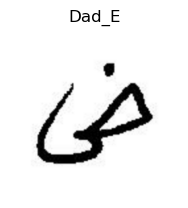

In [56]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in data.take(1):
    for i in range(1):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")